In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from scipy.stats import norm
plt.style.use('seaborn-whitegrid')

In [14]:
Gaussian = namedtuple('Gaussian', ['mean', 'var'])
Gaussian.sample = lambda self, n: np.random.normal(self.mean, self.var, n)

def product_gaussians(self, other_g):
    m1, m2 = self.mean, other_g.mean
    v1, v2 = self.var, other_g.var
    #v1_sqr, v2_sqr = v1**2, v2**2
    mean = (v1*m2 + v2*m1) / (v1 + v2)
    var = (v1*v2) / (v1 + v2)
    return Gaussian(mean=mean, var=var)

def add_gaussians(self, other_g):
    mean = self.mean + other_g.mean
    var = self.var + other_g.var
    return Gaussian(mean=mean, var=var)

def plot_gaussian(self):
    #title = '$\mathcal{N}'+'({0},{1})'.format(self.mean, self.var)+'$'
    #x = np.arange(-self.var*5, self.var*5, .01)
    #y = norm(loc=self.mean, scale=self.var).pdf(x)
    x, y, title = self.pdf()
    plt.plot(x, y)
    plt.title(title)
    plt.show()

def pdf_gaussian(self):
    title = '$\mathcal{N}'+'({0:1.2f},{1:1.2f})'.format(self.mean, self.var)+'$'
    x = np.arange(-self.var*5, self.var*5, .01)
    y = norm(loc=self.mean, scale=self.var).pdf(x)
    return x, y, title

def str_gaussian(self):
    return '𝒩(μ={:.3f}, 𝜎²={:.3f})'.format(self.mean, self.var)

Gaussian.__mul__ = product_gaussians
Gaussian.__add__ = add_gaussians
Gaussian.__str__ = str_gaussian
Gaussian.__repr__ = str_gaussian
Gaussian.plot = plot_gaussian
Gaussian.pdf = pdf_gaussian

In [15]:
def gaussian_comparing(gs):
    legend = []
    for g in gs:
        legend.append('$\mathcal{N}'+'({0:1.2f},{1:1.2f})'.format(g.mean, g.var)+'$')
        x = np.arange(-g.var*5, g.var*5, .01)
        y = norm(loc=g.mean, scale=g.var).pdf(x)
        plt.plot(x, y)
    plt.legend(legend)
    plt.show()

In [16]:
def predict(pos, mvt):
    return pos + mvt

In [17]:
predict(Gaussian(10.0, 0.2**2), Gaussian(15.0, 0.7**2))

𝒩(μ=25.000, 𝜎²=0.530)

In [18]:
def update(prior, likelihood):
    return prior*likelihood

In [19]:
update(Gaussian(10.0, 0.2**2), Gaussian(15.0, 0.7**2))

𝒩(μ=10.377, 𝜎²=0.037)

In [38]:
def noisy_linear(x):
    return np.random.randn(len(x))*0.85 + x

In [55]:
np.random.seed(13)

process_var = 1.
sensor_var = 2.

x = Gaussian(0., 20.**2)

velocity = 1
dt = 1.
process_model = Gaussian(velocity, process_var)

zs = [1.354, 1.882, 4.341, 7.156, 6.939, 6.844, 9.847, 12.553, 16.273, 14.800]

x.mean=1.000	 x.var=401.000	 z=1.354	 x.mean=1.352	 x.var=1.990
x.mean=2.352	 x.var=2.990	 z=1.882	 x.mean=2.070	 x.var=1.198
x.mean=3.070	 x.var=2.198	 z=4.341	 x.mean=3.736	 x.var=1.047
x.mean=4.736	 x.var=2.047	 z=7.156	 x.mean=5.960	 x.var=1.012
x.mean=6.960	 x.var=2.012	 z=6.939	 x.mean=6.949	 x.var=1.003
x.mean=7.949	 x.var=2.003	 z=6.844	 x.mean=7.396	 x.var=1.001
x.mean=8.396	 x.var=2.001	 z=9.847	 x.mean=9.122	 x.var=1.000
x.mean=10.122	 x.var=2.000	 z=12.553	 x.mean=11.337	 x.var=1.000
x.mean=12.337	 x.var=2.000	 z=16.273	 x.mean=14.305	 x.var=1.000
x.mean=15.305	 x.var=2.000	 z=14.800	 x.mean=15.053	 x.var=1.000


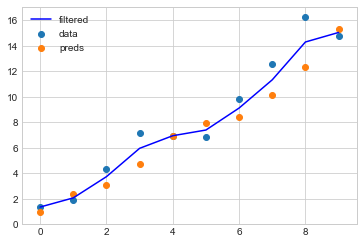

In [56]:
# Kalman filter
xs, predictions = [], []

for z in zs:
    prior = predict(x, process_model)
    likelihood = Gaussian(z, sensor_var)
    x = update(prior, likelihood)
    
    xs.append(x.mean)
    predictions.append(prior.mean)
    
    print('x.mean={:3.3f}\t x.var={:3.3f}\t z={:3.3f}\t x.mean={:3.3f}\t x.var={:3.3f}'.format(
        prior.mean, prior.var, z, x.mean, x.var
    ))

xn = np.arange(0, len(zs), 1)
plt.scatter(xn, zs)
plt.scatter(xn, predictions)
plt.plot(xn, xs, 'b-')
plt.legend(['filtered', 'data', 'preds'])
plt.show()